## Install standalone library

In [ ]:
## SHAP and LIME
!pip install --upgrade shap lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 7.5 MB/s 
     |████████████████████████████████| 275 kB 37.7 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=71fcddb6219e14af177fc0255b30f13026cc0f9b995ffa0b28d4bd51b2e57a8c
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
## stop word list
!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=1fe93f717d2f2389cfac4e05d51cae9d119085b62a7b99c7412cecdb8554b6a6
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


## Import necessary library 

In [ ]:
## Normal libs to work with data
## adding support for large, multi-dimensional arrays and matrices.
import numpy as np 
## data structures and operations for manipulating numerical tables and time series.
import pandas as pd 

################################################################################
# Visualization
## the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.
%matplotlib inline 
## provides an implicit, MATLAB-like, way of plotting
import matplotlib.pyplot as plt 
## provides a high-level interface for drawing attractive and informative statistical
import seaborn as sns

################################################################################
## Utility
from collections import Counter
import string

################################################################################
## Feature engineering
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize


################################################################################
## ML models
## split data into train and test
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

################################################################################
## Evaluate model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

################################################################################
## SHAP
import shap

## LIME
import lime
import lime.lime_tabular

In [ ]:
import imblearn

In [ ]:
sklearn.__version__

In [ ]:
## download external text libs data
import nltk
from stop_words import get_stop_words
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Get data

In [ ]:
## get data from remote file if needed
## url = "https://docs.google.com/spreadsheets/d/1ZVemCFQ_cWCEjriTFBLYHGM33q56eISk/edit?usp=sharing&ouid=102981063366545209715&rtpof=true&sd=true"
## s = requests.get(url).text

## get data by uploading file
df = pd.read_excel('Womens_Clothing_E_Commerce_Reviews.xlsx', sheet_name='Reviews', index_col=0)

In [ ]:
## check 5 rows of dataset
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0.0,767.0,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates
1.0,1080.0,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses
2.0,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses
3.0,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants
4.0,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses


## Feature engineering

#### Fill NaN value with ' '. Avoid nan string when combine texts

In [ ]:
## avoid nan string when combine texts
df['Title'] = df['Title'].fillna('')
df['Review Text'] = df['Review Text'].fillna('')

#### Combine Title & Review Text column into 1 Review Description column

In [ ]:
## combine Title & Review Text column into 1 Review Description column
df = df.assign(ReviewDescription = df['Title'].astype(str) + ' ' + df['Review Text'].astype(str))
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,ReviewDescription
0.0,767.0,33.0,,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and com...
1.0,1080.0,34.0,,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happen...
2.0,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3.0,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4.0,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


#### Drop NaN values

In [ ]:
## drop NaN values in categorical columns
df = df.dropna()
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
ReviewDescription          0
dtype: int64

#### Remove special character in ReviewDescription column

In [ ]:
## remove special character
df['ReviewDescription'] = df['ReviewDescription'].str.replace(r"[^a-zA-Z ]","")
df['ReviewDescription'] = df['ReviewDescription'].str.replace(r"[0-9]","")
df.head()

The default value of regex will change from True to False in a future version.
The default value of regex will change from True to False in a future version.


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,ReviewDescription
0.0,767.0,33.0,,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates,Absolutely wonderful silky and sexy and comf...
1.0,1080.0,34.0,,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses,Love this dress its sooo pretty i happened ...
2.0,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3.0,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants,My favorite buy I love love love this jumpsuit...
4.0,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


#### Binning rating

In [ ]:
## if 1-3 stars = 0 
## if 4-5 stars = 1
bins = [0, 3, 5]
labels = [0,1]
df['Binned Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels)
df.tail()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,ReviewDescription,Binned Rating
23476.0,1104.0,34.0,Great dress for many occasions,I was very happy to snag this dress at such a ...,5.0,1.0,0.0,General Petite,Dresses,Dresses,Great dress for many occasions I was very happ...,1
23477.0,862.0,48.0,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3.0,1.0,0.0,General Petite,Tops,Knits,Wish it was made of cotton It reminds me of ma...,0
23478.0,1104.0,31.0,"Cute, but see through","This fit well, but the top was very see throug...",3.0,0.0,1.0,General Petite,Dresses,Dresses,Cute but see through This fit well but the top...,0
23479.0,1084.0,28.0,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3.0,1.0,2.0,General,Dresses,Dresses,Very cute dress perfect for summer parties and...,0
23480.0,1104.0,52.0,Please make more like this one!,This dress in a lovely platinum is feminine an...,5.0,1.0,22.0,General Petite,Dresses,Dresses,Please make more like this one This dress in a...,1


#### Copy df

In [ ]:
## copy df into another dataframe to save original data
rating_class = df.copy()

#### Remove unfrequent words

In [ ]:
## get a frequent word dictionary
words_fdist = FreqDist(word for word in word_tokenize(rating_class['ReviewDescription'].str.cat(sep=' ')))

## convert dict to df
words_df = pd.DataFrame.from_dict(words_fdist,\
                                       orient='index').\
                                rename(columns={0:'freq'})

## get common list words                                
common_l = words_df[words_df.freq > 50].index.to_list()
stop_words = list(get_stop_words('en'))

common_l = [w for w in common_l if not w in stop_words]
print(common_l)

['Absolutely', 'wonderful', 'silky', 'sexy', 'comfortable', 'Love', 'dress', 'pretty', 'happened', 'find', 'store', 'im', 'glad', 'bc', 'never', 'ordered', 'online', 'petite', 'bought', 'love', 'length', 'hits', 'just', 'little', 'knee', 'definitely', 'true', 'midi', 'someone', 'truly', 'design', 'flaws', 'I', 'high', 'hopes', 'really', 'wanted', 'work', 'initially', 'small', 'usual', 'size', 'found', 'fact', 'zip', 'medium', 'ok', 'overall', 'top', 'half', 'fit', 'nicely', 'bottom', 'tight', 'layer', 'several', 'somewhat', 'cheap', 'layers', 'flaw', 'sewn', 'zipper', 'c', 'My', 'favorite', 'buy', 'jumpsuit', 'fun', 'flirty', 'fabulous', 'every', 'time', 'wear', 'get', 'nothing', 'great', 'compliments', 'Flattering', 'shirt', 'This', 'flattering', 'due', 'adjustable', 'front', 'tie', 'perfect', 'leggings', 'sleeveless', 'pairs', 'well', 'cardigan', 'Not', 'dresses', 'one', 'feet', 'tall', 'usually', 'p', 'brand', 'package', 'lot', 'skirt', 'long', 'full', 'frame', 'take', 'away', 'garm

In [ ]:
## print number of common words
len(common_l)

1505

In [ ]:
def remove_unfreq_words(review, common_l):
    ## tokenizer
    nopunc = []
    word_lst = []
    for word in review.split():
        if word.lower() not in common_l:
            review.replace(word, '')
        else:
            nopunc.append(word.lower()) ## lower text

    nopunc = ' '.join(nopunc)

    return nopunc

In [ ]:
## remove unfrequen words
rating_class['ReviewDescription'] = rating_class['ReviewDescription'].apply(remove_unfreq_words, common_l=common_l)
rating_class['ReviewDescription']

0.0              absolutely wonderful silky sexy comfortable
1.0        love dress pretty happened find store im glad ...
2.0        design flaws high hopes dress really wanted wo...
3.0        favorite buy love love love jumpsuit fun flirt...
4.0        flattering shirt shirt flattering due adjustab...
                                 ...                        
23476.0    great dress many occasions happy snag dress gr...
23477.0    wish made cotton reminds maternity clothes sof...
23478.0    cute see fit well top see never worked im glad...
23479.0    cute dress perfect summer bought dress wedding...
23480.0    please make like one dress lovely feminine fit...
Name: ReviewDescription, Length: 23467, dtype: object

#### Text processing in general

In [ ]:
lemmatizer = WordNetLemmatizer()

def text_process(review):

    def lemmatization(inputs):  # Ref.1
        return [lemmatizer.lemmatize(word=kk) for kk in inputs]

    ## tokenizer
    nopunc = []
    word_lst = []
    for word in review:
        if word not in string.punctuation:
            nopunc.append(word.lower()) ## lower text

    nopunc = ''.join(nopunc)

    ## stop words
    for word in nopunc.split():
        if word.lower() not in stopwords.words('english'):
            word_lst.append(word)

    lemma_lst = lemmatization(word_lst)
    return lemma_lst

In [ ]:
## get text column to preprocess
X_review=rating_class['ReviewDescription']

## get y column to later join to processed X
y=rating_class['Binned Rating']

In [ ]:
## tf idf 
bow_transformer=TfidfVectorizer(analyzer=text_process).fit(X_review)
X_review = bow_transformer.transform(X_review)

#### Get features matrix from vectorized tf-idf

In [ ]:
## get feature names
features_df = pd.DataFrame(X_review.toarray(), columns = bow_transformer.get_feature_names())
features_df

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


,able,absolutely,accessory,accurate,across,actual,actually,add,added,adding,...,yes,yesterday,yet,yoga,youd,youll,youre,zip,zipped,zipper
0,0.000000,0.386802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171908,0.0,0.150941
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23462,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
23463,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
23464,0.291969,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
23465,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


#### Combine multiple sources into a consolidated dataframe

In [ ]:
## combine y into X, for undersampling
features_df = features_df.merge(y.rename('Binned Rating'), left_index=True, right_index=True)
features_df

,able,absolutely,accessory,accurate,across,actual,actually,add,added,adding,...,yesterday,yet,yoga,youd,youll,youre,zip,zipped,zipper,Binned Rating
0.0,0.000000,0.386802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1
1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1
2.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.171908,0.0,0.150941,0
3.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1
4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23462.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1
23463.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1
23464.0,0.291969,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1
23465.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1


In [ ]:
## get the 'Recommended IND' column since it has high correlation with y
features_df['Recommended IND'] = df['Recommended IND']

## Prepare input

TODO: Change variable names

#### Prepare X, y

In [ ]:
## random state to get the same result when run code, parameter for reproducibility
rand = 9
np.random.seed(rand)

In [ ]:
## prepare X and y
X = features_df.drop(['Binned Rating'], axis=1).copy()
y = features_df['Binned Rating']

#### Random sampling

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X, y = rus.fit_resample(X, y)

In [ ]:
# new class distribution
print(Counter(y))

Counter({0: 5270, 1: 5270})


#### Train test split

In [ ]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.33, 
                                                    random_state=rand)

## SVC

#### Modeling

In [ ]:
## SVC model
svm_mdl = SVC(probability=True, gamma='auto', random_state=rand)
fitted_svm_mdl = svm_mdl.fit(X_train, y_train)
predict_test = svm_mdl.predict(X_test)

#### Evaluation

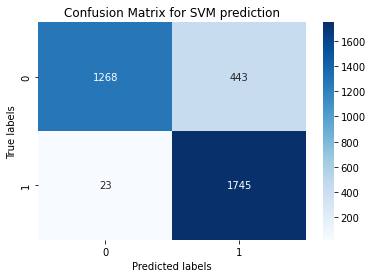

In [ ]:
# generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predict_test)

# plot cf matrix
ax = plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM prediction'); 
ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']);

In [ ]:
print("Classification report:")
print(classification_report(y_test, predict_test))

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1711
           1       0.80      0.99      0.88      1768

    accuracy                           0.87      3479
   macro avg       0.89      0.86      0.86      3479
weighted avg       0.89      0.87      0.86      3479



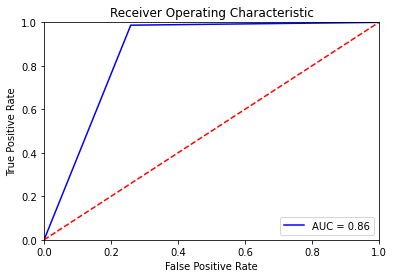

In [ ]:
## roc curve plot
fpr, tpr, threshold = metrics.roc_curve(y_test, predict_test)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SHAP

#### Implementing SHAP into our model

In [ ]:
## prepare X and y
X = features_df.drop(['Binned Rating', 'Recommended IND'], axis=1).copy()
y = features_df['Binned Rating']

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler() 
# resampling X, y
X, y = rus.fit_resample(X, y)

In [ ]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.33, 
                                                    random_state=rand)

In [ ]:
## SVC model
svm_mdl = SVC(probability=True, gamma='auto', random_state=rand)
fitted_svm_mdl = svm_mdl.fit(X_train, y_train)
predict_test = svm_mdl.predict(X_test)

In [ ]:
## take small sample of X_train
import math
sample_size = 0.01
sample_idx = np.random.choice(X_train.shape[0], 
                              math.ceil(X_train.shape[0]*sample_size), 
                              replace=False)

In [ ]:
X_train_shap = X_train.iloc[sample_idx]
y_train_shap = y_train.iloc[sample_idx]

In [ ]:
sample_idx_test = np.random.choice(X_test.shape[0], 
                              math.ceil(X_test.shape[0]*sample_size), 
                              replace=False)

In [ ]:
X_test_shap = X_test.iloc[sample_idx_test]
y_test_shap = y_test.iloc[sample_idx_test]

In [ ]:
## implementing SHAP
X_train_summary = shap.kmeans(X_train, 10)
shap_svm_explainer = shap.KernelExplainer(fitted_svm_mdl.predict_proba,
                                          X_train_summary)
shap_svm_values_test = shap_svm_explainer.shap_values(X_test_shap,
                                                      nsamples=200, 
                                                      l1_reg="num_features(20)")

X does not have valid feature names, but SVC was fitted with feature names


  0%|          | 0/35 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid fea

#### Plotting SHAP figures

In [ ]:
## since we will use seaborn plot styling, which is activated with set(), 
## we will first save the original matplotlib settings (rcParams) so that we can restore them later.
orig_plt_params = plt.rcParams
sns.set()

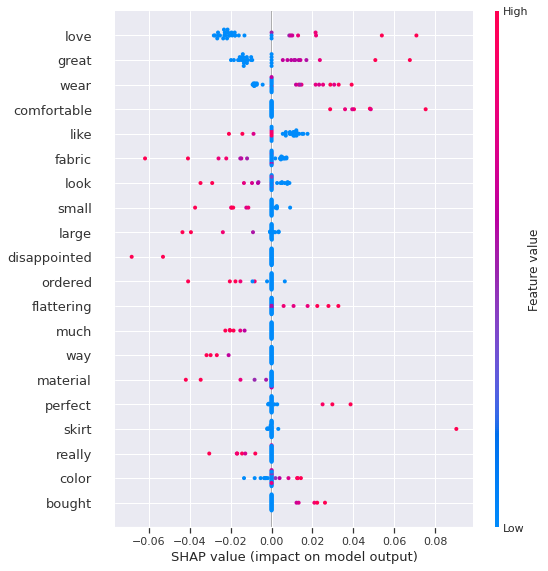

In [ ]:
## plot summary SHAP chart
shap.summary_plot(shap_svm_values_test[1], 
                  X_test_shap, 
                  plot_type="dot")

#### Local interpretation for a group of predictions using decision plots

In [ ]:
sample_test_idx = X_test_shap.index.get_indexer_for([5180,5, 6])

In [ ]:
expected_value = shap_svm_explainer.expected_value[1]

In [ ]:
y_test_shap_pred = (shap_svm_values_test[1].sum(1) + expected_value) > 0.5 

In [ ]:
FN = (~y_test_shap_pred[sample_test_idx]) & (y_test.iloc[sample_test_idx] == 1).to_numpy()

In [ ]:
sns.reset_orig()
plt.rcParams.update(orig_plt_params)

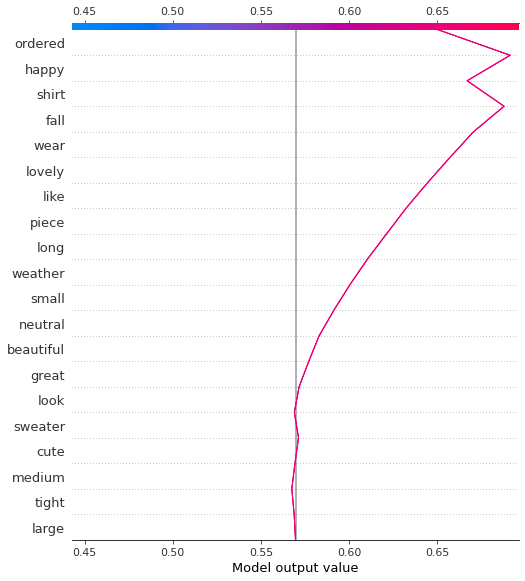

In [ ]:
expected_value = shap_svm_explainer.expected_value[1]

shap.decision_plot(expected_value, shap_svm_values_test[1][sample_test_idx],
                   X_test_shap.iloc[sample_test_idx], highlight=FN)

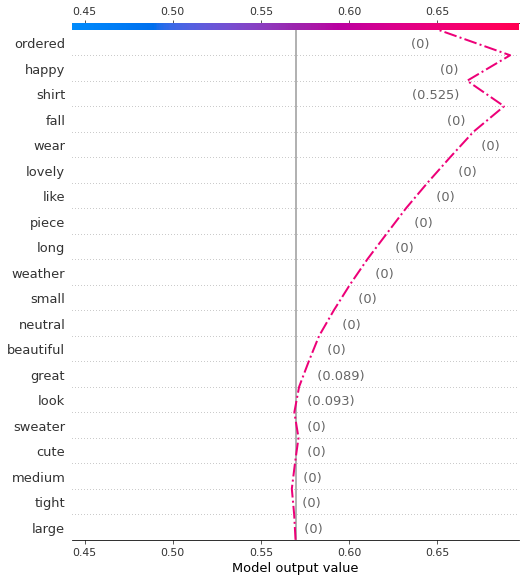

In [ ]:
shap.decision_plot(expected_value, shap_svm_values_test[1][34], X_test.iloc[34], highlight=0)

# LIME

Local interpretation for a single prediction at a time using
LimeTabularExplainer

In [ ]:
lime_svm_explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values,
                                       feature_names=X_test.columns,
                                       class_names=['Not Highly Recomm.', 'Highly Recomm.'])

In [ ]:
lime_svm_explainer.explain_instance(X_test[X_test.index==5180].values[0],
                                    fitted_svm_mdl.predict_proba,
                                    num_features=10).show_in_notebook(predict_proba=True)

X does not have valid feature names, but SVC was fitted with feature names


In [ ]:
X_test

,able,absolutely,accessory,accurate,across,actual,actually,add,added,adding,...,yes,yesterday,yet,yoga,youd,youll,youre,zip,zipped,zipper
3410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
5180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221528,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
8145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
6416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.17293,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.294998,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
10517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0


In [ ]:
X_test.index==5180

array([False,  True, False, ..., False, False, False])

In [ ]:
rating_class.index==3410

array([False, False, False, ..., False, False, False])

In [ ]:
rating_class['ReviewDescription']

0.0              absolutely wonderful silky sexy comfortable
1.0        love dress pretty happened find store im glad ...
2.0        design flaws high hopes dress really wanted wo...
3.0        favorite buy love love love jumpsuit fun flirt...
4.0        flattering shirt shirt flattering due adjustab...
                                 ...                        
23476.0    great dress many occasions happy snag dress gr...
23477.0    wish made cotton reminds maternity clothes sof...
23478.0    cute see fit well top see never worked im glad...
23479.0    cute dress perfect summer bought dress wedding...
23480.0    please make like one dress lovely feminine fit...
Name: ReviewDescription, Length: 23467, dtype: object

In [ ]:
## get data by uploading file
df = pd.read_excel('Womens_Clothing_E_Commerce_Reviews.xlsx', sheet_name='Reviews', index_col=0)

In [ ]:
df.iloc[5180]['Review Text']